# **Project Title**: Exploring Amazon Prime Shows and Movies  

### Project Type: Exploratory Data Analysis  
### Contribution: Individual  


---
*Created by Pratham sharma*  
*22 July 2025*


## **GitHub Link -**

# Project Summary: Exploratory Data Analysis of Amazon Prime TV Shows and Movies

## **Project Overview**


With the rapid growth of video-on-demand platforms, Amazon Prime Video has become a major player in the global entertainment industry. This project aims to explore and understand the structure and trends of the content available on Amazon Prime by using Exploratory Data Analysis (EDA) techniques.

The main objective of the project is to uncover patterns and relationships within the available data that can help in understanding user preferences, content distribution, genre trends, and the overall performance of shows and movies. The insights gained can assist businesses, content creators, and analysts in making data-driven decisions regarding production, marketing, and content acquisition.



## **Dataset Description**

**We used two datasets:**


**1.**    titles.csv
- This dataset contains metadata for all titles available on Amazon Prime, including both movies and TV shows.


**2.**credits.csv

- This dataset contains cast and crew information for each title, linked through a common id.


## **Data Dictionary**


**titles.csv – Columns:**






**id** - Unique identifier for each title

**title** - Name of the movie or TV show

**type** - Whether the content is a "MOVIE" or "SHOW"

**description**	- A brief summary of the title

**release_year**	- Year the content was released

**age_certification**	- Viewer age rating (e.g., PG, 18+, R)

**runtime**	- Duration of the content in minutes

**genres**	- List of genres associated with the title

**production_countries**	- Countries where the content was produced

**seasons** -	Number of seasons (only applicable for shows)

**imdb_id** -	Unique ID on IMDb for reference

**imdb_score**	- IMDb rating (0–10 scale)

**imdb_votes**	- Number of votes on IMDb

**tmdb_popularity**	- Popularity score on TMDb

**credits.csv – Columns:**



**id** -	Matches the id in titles.csv

**name** - 	Name of the person (actor/director)

**role**	- Role of the person in the title (e.g., ACTOR, DIRECTOR)


## **Problem Statement:**
This dataset was made to study all the shows on Amazon Prime Video and find out useful information like:

**Content Diversity**: Which types of shows (genres and categories) are most common?

**Regional Availability**: How does the availability of shows change in different areas?

**Trends Over Time**: How has the collection of shows on Amazon Prime changed over time?

**IMDb Ratings & Popularity**: Which shows are the highest-rated or most loved by viewers?

By looking at this data, businesses, show makers, and data experts can learn important trends to help grow subscriptions, keep viewers interested, and decide where to invest in new content for the streaming world.

## **Data Cleaning and Imputation**

Before beginning the analysis, the following data cleaning steps were performed:


**Merging**: The titles and credits datasets were merged on the id column to bring cast and crew data into the main dataset.

**Handling Missing Values**: Columns like imdb_score, genres, and runtime had missing values. We used strategies like removal of incomplete rows or filling with default/mean values based on context.

**Type Conversion**: Ensured correct data types — for example, converting release_year to integer and imdb_score to float.

**Splitting Multi-Valued Fields**: Columns like genres, production_countries, and cast were split into lists for better analysis.

**Duplicate Removal**: Any duplicate rows (if present) were removed.



## **Analysis Methodology – UBM Framework**


To explore the data in a structured way, we followed the UBM (Univariate, Bivariate, Multivariate) analysis rule:

 - Univariate Analysis
Analyzed individual columns like type, genres, release_year, imdb_score, etc., using pie charts, bar plots, and histograms.

 - Bivariate Analysis
Studied relationships between two variables — e.g., imdb_score vs. type, release_year vs. genre, etc.

 - Multivariate Analysis
Analyzed combinations of three or more variables — such as release_year vs. genre vs. imdb_score — using heatmaps and grouped plots.

We created over **20 visualizations**, each following the UBM Rule: Univeriate, Bivariate and Multivariate.

##Import the libraries for data analysis and visulization



In [ ]:
# Libraries for data handling and analysis
import pandas as pd  # for dataframes
import numpy as np   # for numerical operations

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot styling
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")  # Clean style for all plots

****

**Load both zip file**

In [ ]:
### Load both zipped CSV files

titles = pd.read_csv("titles.csv.zip")

credits = pd.read_csv("credits.csv.zip")

Now read and check the first 5 rows to understand the data

In [ ]:
# First 5 rows of the dataset of titles

titles = pd.read_csv('titles.csv.zip')

titles.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [ ]:
# First 5 rows of the dataset of credits
credits = pd.read_csv('credits.csv.zip')
credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


**Merging the Datasets on `id`**

We merged the `titles` and `credits` datasets using the common column `id`. This allows us to combine content information (like title, type, genre, rating) with the associated cast and crew members (actors, directors, etc.).


In [ ]:
# Before merging, check the count of unique IDs in both dataset

print("Unique IDs in titles:", titles['id'].nunique())

print("Unique IDs in credits:", credits['id'].nunique())


Unique IDs in titles: 9868
Unique IDs in credits: 8861


In [ ]:
#Checking Common IDs in Both Datasets

matched_ids = set(titles['id']).intersection(set(credits['id']))

print("IDs present in both datasets:", len(matched_ids))


IDs present in both datasets: 8861


In [ ]:
# Merge datasets on 'id'

# We'll use a left join to keep all titles even if no credits are available

merged_data = pd.merge(titles, credits, on='id', how='left')



In [ ]:
# Preview merged data

merged_data

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174.0,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713.0,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125349,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN,1938565.0,Vijay Thakur,Sanjay Thakur,ACTOR
125350,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN,728899.0,Vanya Wellens,Budhiya,ACTOR
125351,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN,1938620.0,Vishwa Bhanu,Gissu,ACTOR
125352,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN,1938620.0,Vishwa Bhanu,NaN,DIRECTOR


:Now check the basic information of Merged data

In [ ]:
# Basic Information about the Merged Dataset

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125354 entries, 0 to 125353
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125354 non-null  object 
 1   title                 125354 non-null  object 
 2   type                  125354 non-null  object 
 3   description           125163 non-null  object 
 4   release_year          125354 non-null  int64  
 5   age_certification     56857 non-null   object 
 6   runtime               125354 non-null  int64  
 7   genres                125354 non-null  object 
 8   production_countries  125354 non-null  object 
 9   seasons               8501 non-null    float64
 10  imdb_id               119978 non-null  object 
 11  imdb_score            118987 non-null  float64
 12  imdb_votes            118957 non-null  float64
 13  tmdb_popularity       124800 non-null  float64
 14  tmdb_score            114263 non-null  float64
 15  

## Checking and Removing Duplicate Values
To ensure data quality and prevent skewed analysis, we check for and remove any duplicate rows from the merged dataset.


In [ ]:
# Check how many duplicate rows are in the dataset

duplicate_count = merged_data.duplicated().sum()

print("Number of duplicate rows in the merged dataset:", duplicate_count)

Number of duplicate rows in the merged dataset: 168


In [ ]:
# Remove if any duplicate row exist

merged_data = merged_data.drop_duplicates()


In [ ]:
duplicate_count = merged_data.duplicated().sum()

print("Number of duplicate rows in the merged dataset:", duplicate_count)


Number of duplicate rows in the merged dataset: 0


## Checking for Missing Values
We check the dataset for any missing (`NaN`) values to identify which columns require imputation or cleaning.

In [ ]:
# Count missing values in each column

print("Missing Values in merged data:")

print(merged_data.isnull().sum())


Missing Values in merged data:
id                           0
title                        0
type                         0
description                191
release_year                 0
age_certification        68329
runtime                      0
genres                       0
production_countries         0
seasons                 116685
imdb_id                   5376
imdb_score                6367
imdb_votes                6397
tmdb_popularity            554
tmdb_score               10995
person_id                 1007
name                      1007
character                17284
role                      1007
dtype: int64


## Data Cleaning and Imputation

After identifying the columns with missing values, we apply appropriate imputation techniques to fill in the missing data. This ensures that our analysis is accurate and uninterrupted by null entries.

### Imputation Strategy:

- **Numerical Columns:**
Imputation for Numerical Columns (IMDb & TMDb Fields)

After analyzing missing values in the merged dataset, we applied imputation strategies tailored to the nature of each numerical column.


- **IMDb-related Fields**:
  - If imdb_id, imdb_votes, and imdb_score are all missing → drop the row

 - If only imdb_score is missing → drop the row

 - If only imdb_votes is missing → fill with mean IMDb votes

- **TMDb Fields (`tmdb_score`, `tmdb_popularity`)**:
  - Missing values remove

These imputation choices ensure our dataset remains as accurate as possible without introducing bias, especially in rating-related visualizations.

- **Categorical Columns:**
  - `age_certification`: Replaced with `'Unrated'`.( we cann't remove it because it has 68329 entries )
  - `description`: Replaced with `"No description available"`.(it is not affecting our results )
  - `name`, `role`, `character`, `person_id`: Replaced with `'Unknown'` or `'Not specified'`.

- **the seasons column** is only meaningful for TV Shows, it's important to check:

Are NaN values in seasons only found in Movie rows (which is okay)?

Or are some TV Shows also missing seasons? (which could be a data issue)

- **Columns like `imdb_id`** were left unchanged as they are either optional or not relevant for this stage of analysis.


- For Numerical Columns

In [ ]:
# Drop rows where all three IMDb fields are missing: score, votes, and ID

merged_data = merged_data[~(
    merged_data['imdb_score'].isna() &
    merged_data['imdb_votes'].isna() &
    merged_data['imdb_id'].isna()
)]

# Drop rows where imdb_score is missing

merged_data = merged_data[~merged_data['imdb_score'].isna()]

# Fill missing imdb_votes with the mean (as it has imdb_score, so it's meaningful)

merged_data['imdb_votes'] = merged_data['imdb_votes'].fillna(merged_data['imdb_votes'].mean())

In [ ]:
# Remove rows where tmdb_score is missing

merged_data = merged_data[~merged_data['tmdb_score'].isna()]

In [ ]:
# Check remaining nulls in IMDb & tmdb fields

merged_data[['imdb_id', 'imdb_votes', 'imdb_score', 'tmdb_score']].isnull().sum()

,0
imdb_id,0
imdb_votes,0
imdb_score,0
tmdb_score,0


- For Categorical Columns

In [ ]:
## Fill missing values in age_certification columns (Unrated)

merged_data['age_certification'] = merged_data['age_certification'].fillna('Unrated')

In [ ]:
# Fill missing descriptions with a placeholder

merged_data['description'] = merged_data['description'].fillna("No description available")

In [ ]:
# Fill missing values in cast and crew related columns

merged_data['name'] = merged_data['name'].fillna('Unknown')

merged_data['role'] = merged_data['role'].fillna('Unknown')

merged_data['character'] = merged_data['character'].fillna('Not specified')

merged_data['person_id'] = merged_data['person_id'].fillna('Unknown')

- seasons Columns

In [ ]:
# Check how many rows of type SHOW have missing seasons

missing_seasons_in_shows = merged_data[(merged_data['type'] == 'SHOW') & (merged_data['seasons'].isna())]

# Display the count

print("Number of TV Shows with missing seasons:", missing_seasons_in_shows.shape[0])


Number of TV Shows with missing seasons: 0


In [ ]:
# Final Check: Rechecking for Missing Values

print("Missing Values in merged data:")

print(merged_data.isnull().sum())

Missing Values in merged data:
id                           0
title                        0
type                         0
description                  0
release_year                 0
age_certification            0
runtime                      0
genres                       0
production_countries         0
seasons                 102743
imdb_id                      0
imdb_score                   0
imdb_votes                   0
tmdb_popularity              0
tmdb_score                   0
person_id                    0
name                         0
character                    0
role                         0
dtype: int64


##  What Did You Know About Your Dataset?

The dataset gives information about Amazon Prime Video’s content, including **movies** and **TV shows**. It combines two files:

- `titles.csv`: Includes title name, type (Movie/Show), release year, genres, IMDb score, runtime, etc.
- `credits.csv`: Includes information about cast and crew like actors and directors.

### Key Insights:

- The platform has **more movies** than TV shows.
- Some columns had missing data (`imdb_score`, `age_certification`, `tmdb_score`, etc.), which we handled by **filling or removing**.
- The `seasons` column is relevant only for shows; missing values were mostly from movies (which is fine).
- Cast and crew fields like `name`, `role`, and `character` were also cleaned.
- After cleaning, the dataset is now **complete, organized**, and ready for visual analysis.


## Understand the Variables

In this step, we explore the meaning and purpose of each variable (column) in the merged dataset.

Below is a brief description of all important columns:

### Merged data
- **id**: Unique ID for each title.
- **title**: Name of the movie or TV show.
- **type**: Whether the content is a 'MOVIE' or a 'SHOW'.
- **description**: A short summary of the content.
- **release_year**: The year the title was released.
- **age_certification**: Age rating like 'PG', '18+', etc.
- **runtime**: Duration of the movie or show in minutes.
- **genres**: Genre(s) of the content (e.g., Comedy, Drama).
- **production_countries**: Country or countries where the title was produced.
- **seasons**: Number of seasons (only applies to shows).
- **imdb_id**: Unique identifier from IMDb.
- **imdb_score**: Average IMDb rating.
- **imdb_votes**: Number of votes the title received on IMDb.
- **tmdb_popularity**: Popularity score from TMDb (The Movie Database).
- **tmdb_score**: TMDb user rating out of 10.
- **person_id**: Unique ID for each person (actor, director, etc.).
- **name**: Name of the person (cast or crew).
- **character**: Character name (for actors).
- **role**: Role of the person — usually 'ACTOR' or 'DIRECTOR'.

This understanding helps us analyze the data meaningfully in the next steps.


##  Checking Unique Values for Each Column

We now examine the number of unique values in each column of the merged dataset. This helps identify:
- Categorical vs. numerical columns
- Potential inconsistencies (e.g., typos in category names)
- Variables useful for grouping and plotting


In [ ]:
# To show the number of unique values in each column

print("Unique value count per column:")

merged_data.nunique()

Unique value count per column:


,0
id,7319
title,7233
type,2
description,7315
release_year,110
age_certification,12
runtime,199
genres,1885
production_countries,450
seasons,31


In [ ]:
# Type (movie/show)
print("Unique content types:")
print(merged_data['type'].unique())

# Genres
print("Top 10 Genres:")
print(merged_data['genres'].value_counts().head(10))

# Country (if available)
if 'production_countries' in merged_data.columns:
    print("Top 5 Production Countries:")
    print(merged_data['production_countries'].value_counts().head())

Unique content types:
['SHOW' 'MOVIE']
Top 10 Genres:
genres
['drama']                         7339
['comedy']                        4491
['drama', 'romance']              2335
['horror']                        1813
['drama', 'comedy']               1788
['comedy', 'drama']               1703
['documentation']                 1701
['romance', 'comedy']             1622
['thriller', 'crime', 'drama']    1501
['comedy', 'romance']             1493
Name: count, dtype: int64
Top 5 Production Countries:
production_countries
['US']    61473
['IN']     9378
['GB']     6388
['CA']     2852
['JP']     1883
Name: count, dtype: int64


##  Data Wrangling

In this step, we prepare and restructure our cleaned dataset for better analysis and visualization.

This includes:
- Formatting data types
- Splitting and restructuring multi-valued fields (like `genres` and `production_countries`)
- Renaming or organizing columns where needed

These transformations will help us explore the data more efficiently in upcoming visualizations.


### Preparing Country Data for Analysis

The `production_countries` column contains country codes in a comma-separated string format like `'US, IN'`.

To analyze countries individually, we:
- Clean and split the string into a list of country codes
- Store this in a new column called `countries_list`
- This allows us to filter, group, and even explode rows based on individual countries


In [ ]:
# Split comma-separated values into lists

# Remove brackets and quotes, and strip extra spaces

merged_data['genres'] = merged_data['genres'].astype(str).str.replace(r"[\[\]\'\"]", "", regex=True).str.strip()

# Create genres_list
merged_data['genres_list'] = merged_data['genres'].apply(lambda x: [g.strip() for g in x.split(',')] if pd.notnull(x) else [])


# Clean and split country codes into a list

merged_data['countries_list'] = merged_data['production_countries'].apply(lambda x: [c.strip() for c in x.split(',')] if pd.notnull(x) else []
)



Data type

In [ ]:
print(merged_data.dtypes)

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
person_id                object
name                     object
character                object
role                     object
genres_list              object
countries_list           object
dtype: object


### Data Type Fixing & Optimization

We corrected data types to improve performance and ensure accurate analysis:

- `type`, `age_certification`, `role` → Converted to `category` for better grouping and less memory use.
- `imdb_votes` → Converted to `int` since it represents whole numbers.
- `seasons` → Converted to `Int64` (nullable int) because only shows have season counts.
- `countries_list` → Verified as `list` to allow multiple countries per title.

- `Genres_list` → Verified as `list` to allow multiple genres per title

Our dataset is now optimized and ready for analysis.


In [ ]:
# Convert to 'category' for efficient grouping
merged_data['type'] = merged_data['type'].astype('category')
merged_data['age_certification'] = merged_data['age_certification'].astype('category')
merged_data['role'] = merged_data['role'].astype('category')

# Convert 'imdb_votes' to integer (ensure no NaN before converting)
merged_data['imdb_votes'] = merged_data['imdb_votes'].fillna(0).astype(int)

# Convert 'seasons' to nullable integer (preserves NaN for movies)
merged_data['seasons'] = merged_data['seasons'].astype('Int64')

# Optional: Check updated data types
merged_data.dtypes


,0
id,object
title,object
type,category
description,object
release_year,int64
age_certification,category
runtime,int64
genres,object
production_countries,object
seasons,Int64


##  All Manipulations i Have Done and Insights are .


### Data Manipulations:
- Merged `titles` and `credits` on `id`.
- Handled missing values: dropped or filled based on importance.
- Cleaned `genres` and `production_countries`.
- Created `genres_list` and `countries_list` as lists for better analysis.
- Converted data types (like `type`, `role`, `imdb_votes`, `seasons`) for optimization.

### Insights:
- Most missing `seasons` were from movies (expected).
- Many titles have multiple genres and countries.
- Some titles lacked rating info and were removed.
- Dataset is now clean, structured, and ready for visualizations.


## Outlier Detection Using Boxplots

Before moving to visual analysis, we check for outliers in key numerical columns using boxplots. This helps us identify any extreme values that might skew the results or visualizations.


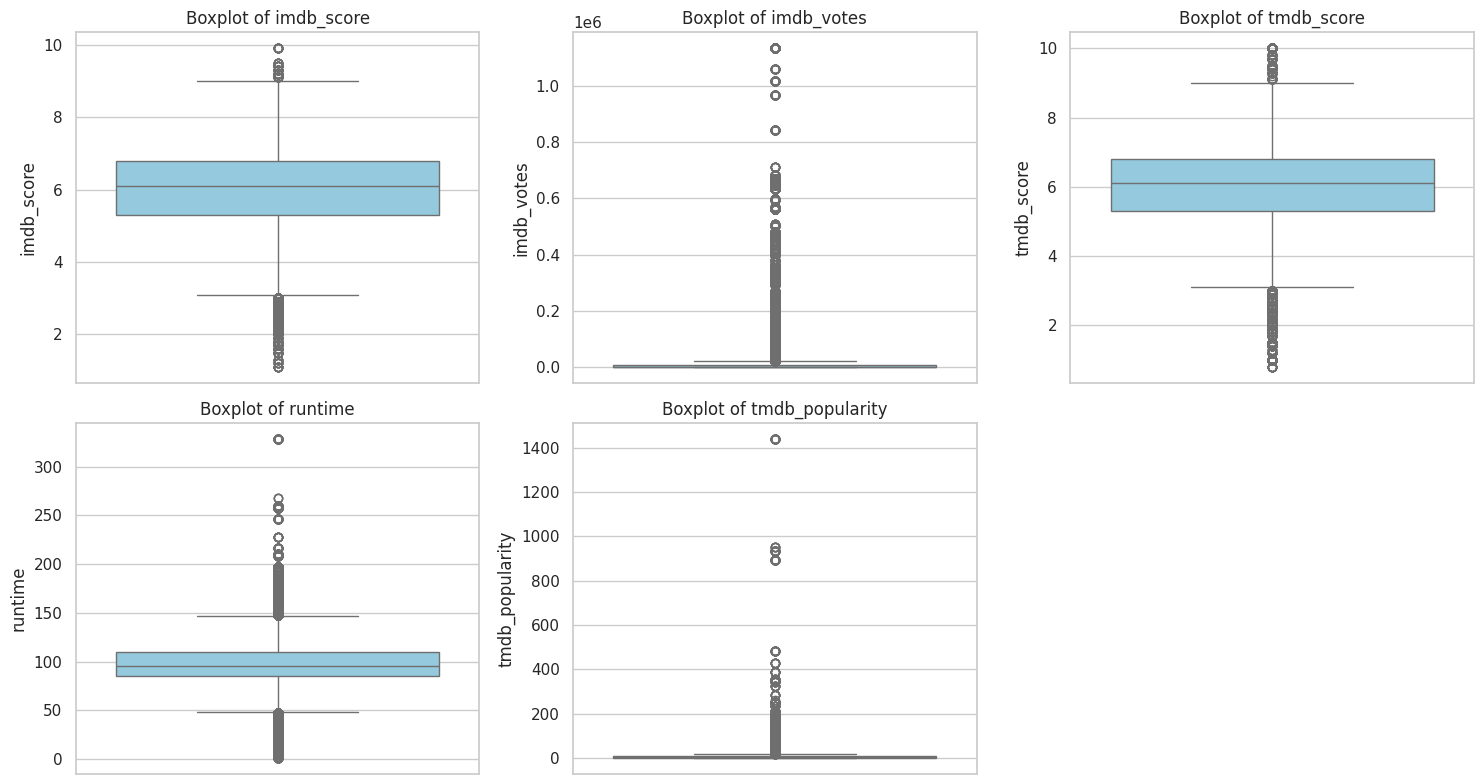

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(15, 8))

# Select relevant numerical columns
num_cols = ['imdb_score', 'imdb_votes', 'tmdb_score', 'runtime', 'tmdb_popularity']

# Plot boxplots
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=merged_data, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()


## **Data Vizualization, Storytelling & Experimenting with charts** :

  Understand the relationships between variables**

Now that we have cleaned, structured, and optimized the dataset, we begin the exploratory data analysis through visualizations. We will follow the **UBM Rule**:

- **U – Univariate Analysis**: Analyze one variable at a time to understand its distribution and structure.
- **B – Bivariate Analysis**: Analyze relationships between two variables.
- **M – Multivariate Analysis**: Analyze interactions among three or more variables.

Each chart will be presented in a structured format including:
- Code  
- Why We Chose This Chart  
- Key Insights  
- Business Impact

We will start with **Univariate Analysis** to explore basic distributions of content type, genres, release year, ratings, and more.

## Chart 1: Content Type Distribution

###  Chart Type & Definition:
**Bar Chart** – A bar chart is used to show the frequency of each content type (Movie or TV Show) in the dataset.

---



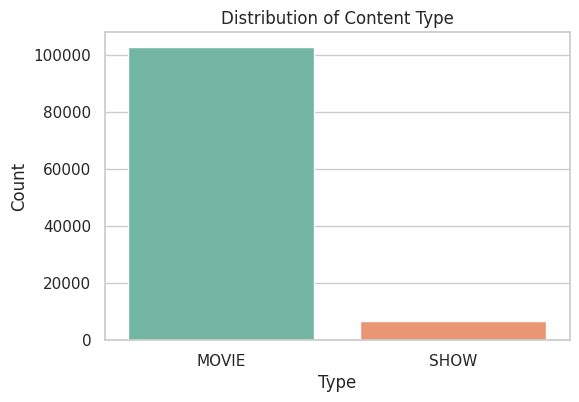

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_data, x='type', palette='Set2')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

**Why We Chose It:**
We selected the **`type`** column because it tells us whether a title is a Movie or a TV Show — a fundamental attribute of the content.

We used a **bar chart** because it clearly shows the comparison between the two content types and helps us understand what kind of content dominates the platform.


**Insights:**
Amazon Prime has significantly more movies than TV shows available on the platform.

**How the Insight Helps Business:**
This tells content teams where Amazon has invested more. If TV shows have high engagement, Amazon may consider increasing show production to balance content and meet demand.

## Chart 2: Age Certification Distribution

**Bar Chart** – This chart displays how content is distributed across different age certification categories (like '13+', '18+', 'PG').

---


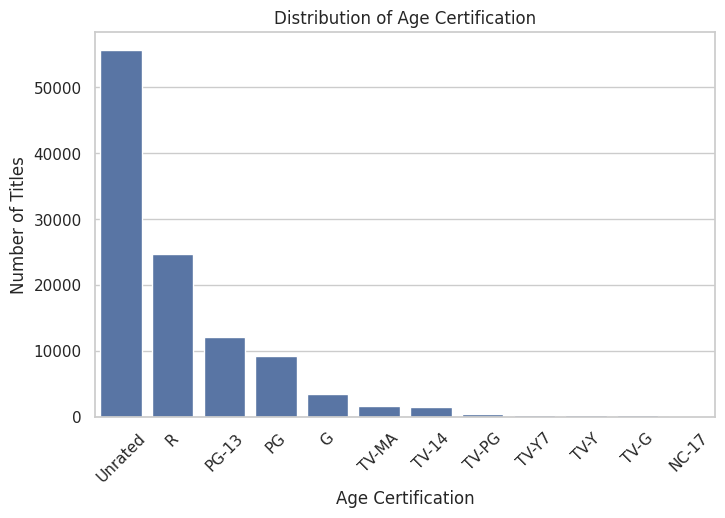

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_data, x='age_certification', order=merged_data['age_certification'].value_counts().index)
plt.title('Distribution of Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

**Why We Chose It:**
We chose the **`age_certification`** column to understand how Amazon Prime categorizes content based on viewer age. This helps assess whether the content is family-friendly, teen-focused, or meant for mature audiences.


**Insights:**  
Most of the content on Amazon Prime is certified for mature audiences (like '18+', '16+'), while family-friendly content has a smaller share.

**How the Insight Helps Business:**  
This insight helps Amazon evaluate whether their content library is balanced for all age groups. If there’s a gap in family or teen content, they can focus on acquiring or producing more age-appropriate shows/movies

## 🧾 Age Certification Labels Explained

Age certifications help identify the appropriate audience for each movie or TV show. They ensure viewers can make safe and informed viewing choices, especially for children and teens.

---

### Movie Ratings (MPAA):

| Label     | Description                                 | Suitable For              |
|-----------|---------------------------------------------|---------------------------|
| **G**     | General Audience – No content concerns      | All ages                  |
| **PG**    | Parental Guidance Suggested                 | Some material may not be suitable for children |
| **PG-13** | Parents Strongly Cautioned                  | Not suitable for children under 13 |
| **R**     | Restricted – May contain adult content       | 17+ (under 17 requires adult) |
| **NC-17** | Adults Only – No one under 18 admitted       | 18+ only                  |

---

### TV Ratings:

| Label      | Description                                          | Suitable For              |
|------------|------------------------------------------------------|---------------------------|
| **TV-Y7**  | For children age 7 and above                         | Kids 7+                   |
| **TV-G**   | General Audience – Suitable for all ages             | All ages                  |
| **TV-PG**  | Parental Guidance Suggested                          | Kids with parents         |
| **TV-14**  | Parents Strongly Cautioned – May not be suitable under 14 | Teens and older        |
| **TV-MA**  | Mature Audience Only – May include explicit content  | Adults (17+)              |

---

These certifications help Amazon Prime manage viewer safety and allow users to filter content by age preference or parental controls.


## Chart 3: Genre Frequency

### Chart Type & Definition:
**Bar Chart** – Shows the most common genres in the dataset. Since titles can have multiple genres, we first split them and count how often each genre appears.

---



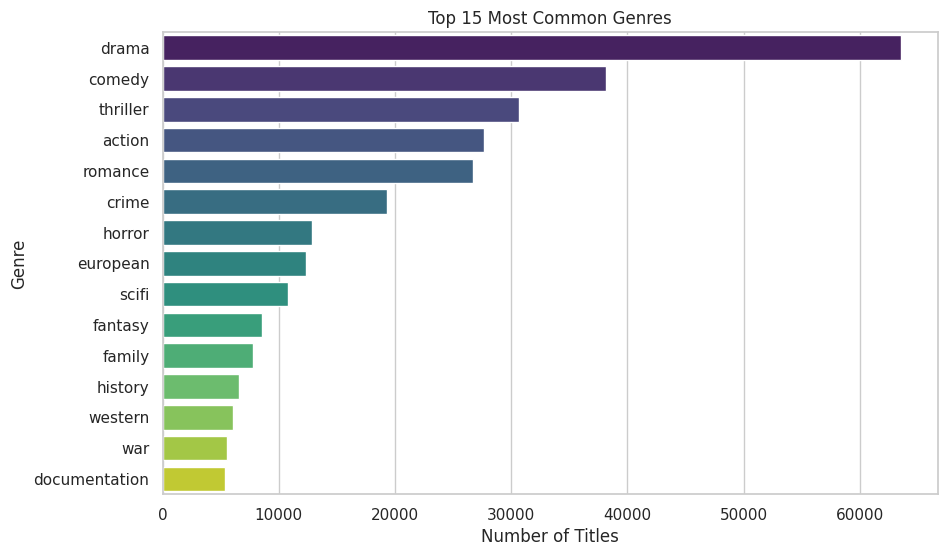

In [ ]:
###
# Flatten all genres from the 'genres_list' column
from collections import Counter

# Count all genres in the list column
all_genres = merged_data['genres_list'].explode()
genre_counts = Counter(all_genres)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot the top 15 genres
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_df.head(15), x='Count', y='Genre', palette='viridis')
plt.title('Top 15 Most Common Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

**Why We Chose It:**
We chose the **genres column** because it helps us understand the type of content Amazon Prime offers. Since each title can have one or more genres, it's important to know which genres are most common.

**Insights**:

Genres like Drama, Comedy, and Action dominate the Amazon Prime library, while niche genres appear less frequently.

**How the Insight Helps Business**:

Helps Amazon understand what genre types are most available and possibly most in-demand. This can guide content acquisition or production — e.g., investing more in underrepresented genres like Sci-Fi or Documentaries to attract niche audiences.

## Chart 4: Top 15 Production Countries

### Chart Type & Definition:
**Bar Chart** – Shows the number of titles produced per country. This helps us understand which countries contribute the most content to Amazon Prime.

---




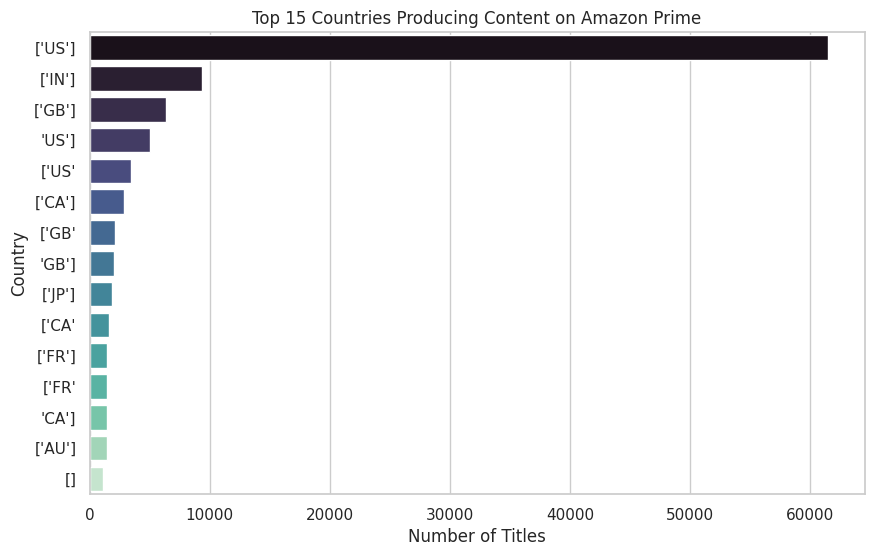

In [ ]:
# Use explode to turn each list item into its own row

top_countries = merged_data.explode('countries_list')

# Count and sort

country_counts = top_countries['countries_list'].value_counts().head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='mako')
plt.title('Top 15 Countries Producing Content on Amazon Prime')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


**Why We Chose It:**
We chose the production_countries column to understand Amazon Prime’s global content diversity. Knowing which countries produce the most content gives insight into regional partnerships and content sourcing strategies.

**Insights:**

The United States is by far the largest contributor of content, followed by countries like India, UK, and Canada. Some countries have very limited representation.

**How the Insight Helps Business:**

This helps Amazon evaluate its global content footprint. If some regions are underrepresented, they can focus on expanding partnerships, dubbing, or acquiring rights to regional content to boost engagement in those areas

## Chart 5: Number of Countries Involved per Title

### Chart Type & Definition:
**Bar Chart** – This chart shows how many titles are produced by 1, 2, 3, or more countries. It helps us understand the level of international collaboration in Amazon Prime content.

---



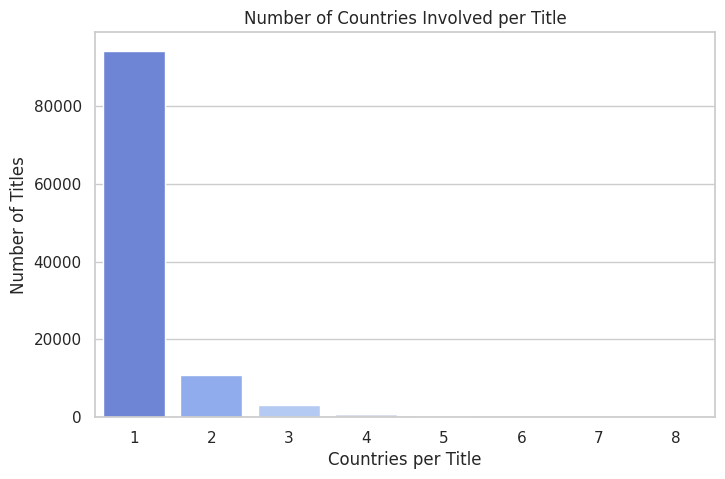

In [ ]:
# Create a new column that counts number of countries per title
merged_data['country_count'] = merged_data['countries_list'].apply(len)

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_data, x='country_count', palette='coolwarm')
plt.title('Number of Countries Involved per Title')
plt.xlabel('Countries per Title')
plt.ylabel('Number of Titles')
plt.show()


**Why We Chose It:**
We selected the countries_list column to analyze how many countries contributed to each title. This gives insights into cross-border collaborations and global reach of content.


**Insights:**

Most titles on Amazon Prime are produced by a single country, but many involve 2 or more countries, showing increasing trends of regional and global partnerships.

**How the Insight Helps Business:**

This helps Amazon evaluate how much of its content is created through international collaboration. If multi-country productions perform well, Amazon may choose to increase co-productions for global appeal.

## Chart 6: Number of Titles Released per Year

### Chart Type & Definition:
**Line Plot** – Shows the number of titles released each year. It helps us understand how Amazon Prime’s content library has evolved over time.

---





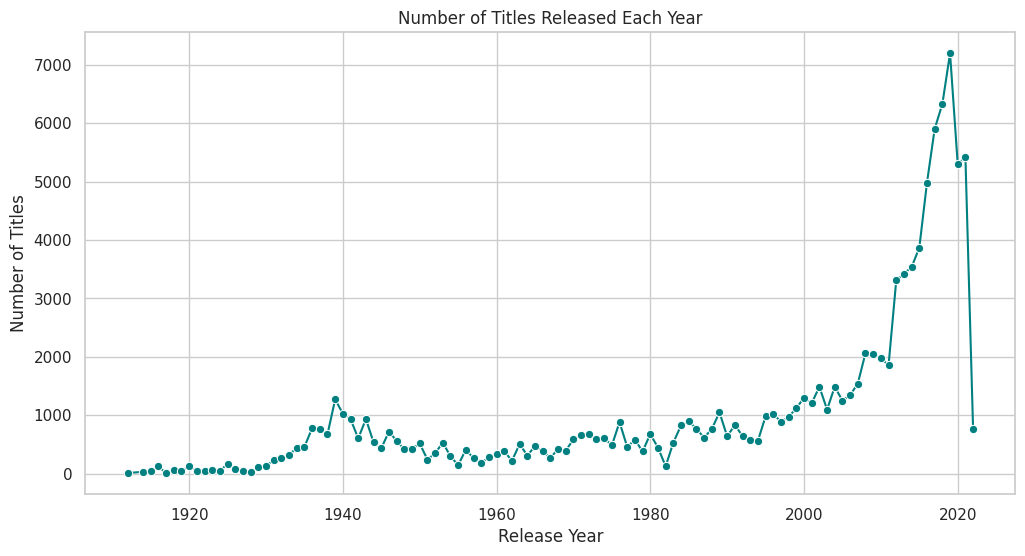

In [ ]:
#Create the release trend data
release_trend = merged_data['release_year'].value_counts().sort_index()

#Plot it
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_trend.index, y=release_trend.values, marker='o', color='teal')
plt.title('Number of Titles Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

**Why We Chose It:**
We chose the release_year column to understand how content production has changed over time. A line plot is ideal to visualize trends across years and spot growth or decline.

**Insights:**

There is a clear growth in the number of releases over the years, especially post-2010, likely due to the expansion of Amazon Prime Video and the streaming boom.

**How the Insight Helps Business:**

Understanding release trends helps Amazon assess how its content pipeline is scaling over time. Sudden drops may indicate external challenges (e.g., COVID), while spikes may align with platform growth. This also helps in planning future content schedules.

## Chart 7: Runtime Distribution

###  Chart Type & Definition:
**Histogram** – This chart shows the distribution of content runtimes (in minutes). It helps us identify the most common lengths for Amazon Prime’s titles.

---



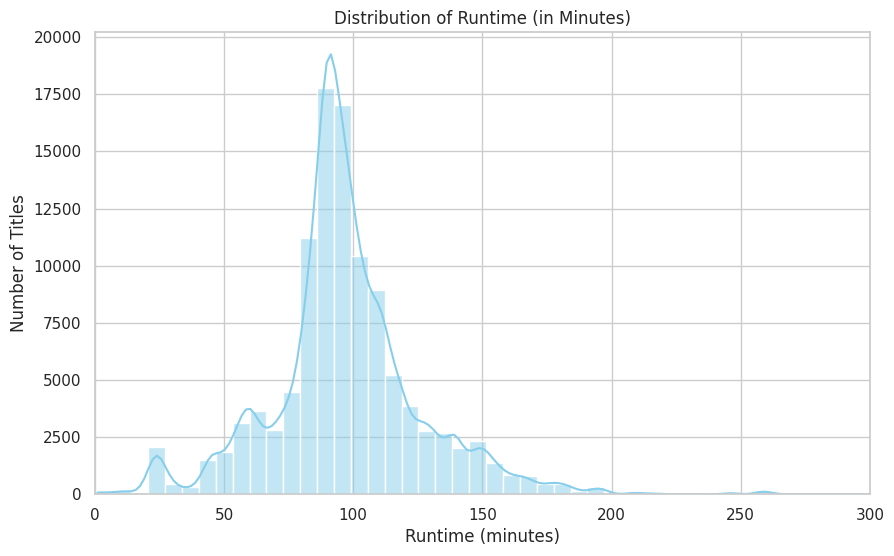

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='runtime', bins=50, kde=True, color='skyblue')
plt.title('Distribution of Runtime (in Minutes)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Titles')
plt.xlim(0, 300)  # limit extreme long durations for clarity
plt.show()


**Why We Chose It:**
We selected the runtime column to understand how long Amazon Prime content typically is. A histogram is ideal for visualizing the distribution of numerical values like time.

**Insights:**

Most content falls between 60–120 minutes, suggesting a focus on standard-length movies. A few outliers with long durations could be documentaries or mislabelled shows.

**How the Insight Helps Business:**

Understanding runtime trends can help Amazon ensure content matches user attention spans and viewing preferences. It can also guide editorial, preview/trailer lengths, and category planning (short films vs full-length).

## Chart 8: IMDb Score Distribution

###  Chart Type & Definition:
**Histogram** – A histogram shows how IMDb scores are spread across titles. It helps identify whether Amazon Prime content is generally rated high or low.

---



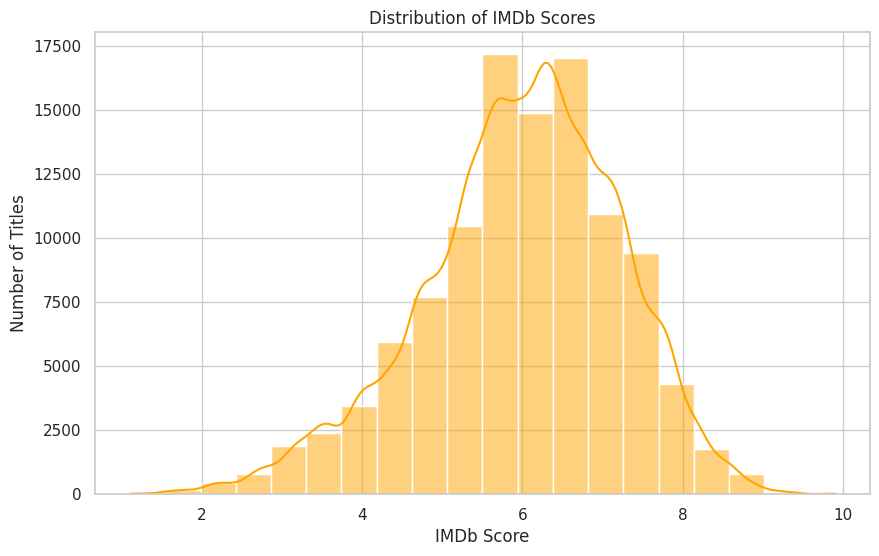

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='imdb_score', bins=20, kde=True, color='orange')
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Number of Titles')
plt.show()


**Why We Chose It:**
We chose the imdb_score column because it reflects audience satisfaction and content quality. A histogram is best for seeing the distribution of ratings across the platform.

**Insights:**

Most titles are rated between 6 and 8, indicating generally favorable reviews. There are fewer low-rated and very high-rated titles.

**How the Insight Helps Business:**

This helps Amazon Prime understand overall content quality from the viewers’ perspective. If the ratings cluster around average, it may push the team to invest in higher-quality or more innovative productions.


## Chart 9: IMDb Votes Distribution

### Chart Type & Definition:
**Histogram** – Displays the number of votes each title received on IMDb. This helps gauge audience engagement.

---




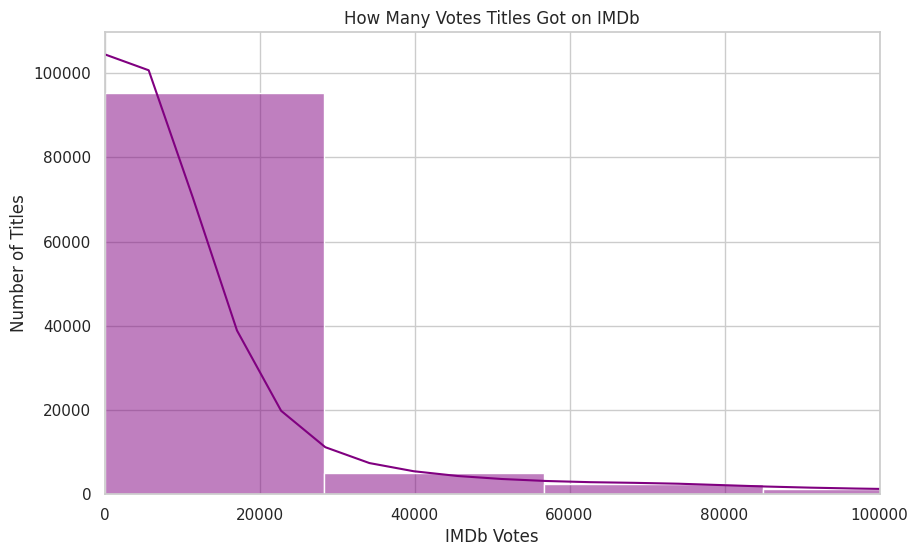

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='imdb_votes', bins=40, kde=True, color='purple')
plt.title('How Many Votes Titles Got on IMDb')
plt.xlabel('IMDb Votes')
plt.ylabel('Number of Titles')
plt.xlim(0, 100000)  # focus on most common range
plt.show()

The imdb_votes column reflects how many users rated each title, which is a direct measure of engagement. A histogram is ideal to visualize this numerical distribution.

**Insights:**

Most titles have less than 20,000 votes, showing that only a few titles generate massive engagement. Some very popular titles receive 100,000+ votes.

**How the Insight Helps Business:**

Identifying high-vote titles helps Amazon understand what’s popular and highly engaged with. It also shows where marketing or discoverability efforts might be needed for lesser-known content.

## Chart 10: TMDB Popularity Distribution

### Chart Type & Definition:
**Histogram** – Shows how popular each title is on TMDB based on a calculated score. It helps us understand which titles have wide reach or visibility.

---

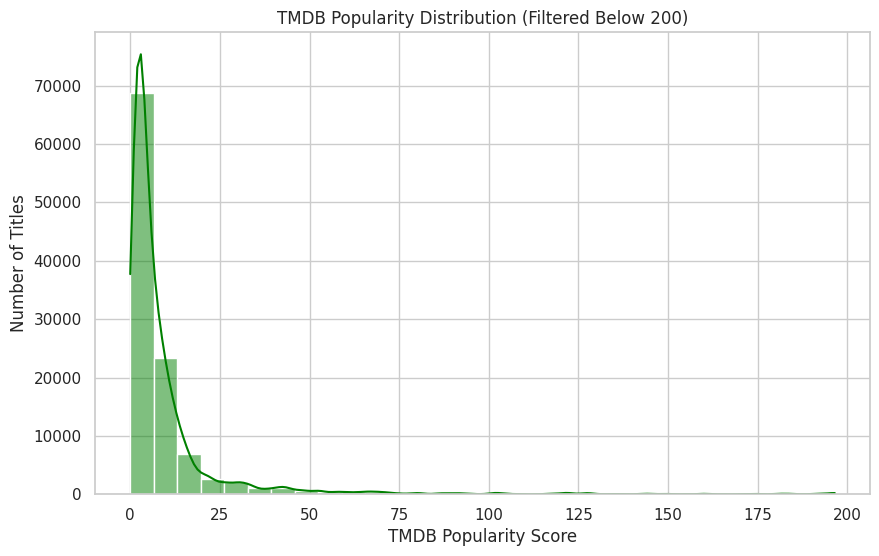

In [ ]:

plt.figure(figsize=(10, 6))
# Filter extreme values for better visibility (most scores are under 200)
filtered_popularity = merged_data[merged_data['tmdb_popularity'] < 200]

sns.histplot(data=filtered_popularity, x='tmdb_popularity', bins=30, kde=True, color='green')
plt.title('TMDB Popularity Distribution (Filtered Below 200)')
plt.xlabel('TMDB Popularity Score')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


We applied a filter to include only titles with a TMDB popularity score below 200.

This is done because some titles have extremely high scores (outliers), which can compress the rest of the data and make the chart hard to read.

By limiting the range, we focus on the majority of titles and make the distribution easier to understand.


**Why We Chose It:**
We used the tmdb_popularity column to understand which titles are most talked about or viewed online. TMDB scores are great for measuring public attention.

**Insights:**
Most titles have a popularity score under 50, showing low online activity. A few titles spike above 100, indicating they’re very popular or trending on TMDB.

**How the Insight Helps Business:**
This helps Amazon see which titles have high online buzz. It also highlights content that may be worth featuring or promoting more on the platform to boost engagement.


---

### **Starting Bivariate Analysis** , like IMDb Score vs Type (Movie vs Show)!


## Chart 11: Average IMDb Score by Content Type

### Chart Type & Definition:
**Bar Chart** – This chart shows the average IMDb rating for Movies and TV Shows, helping us compare user-rated content quality across types.

---





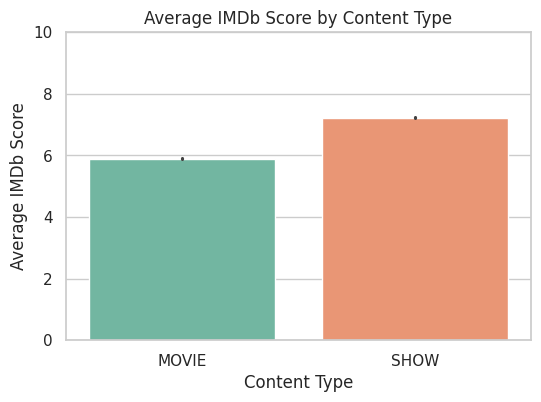

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=merged_data, x='type', y='imdb_score', estimator='mean', palette='Set2')
plt.title('Average IMDb Score by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average IMDb Score')
plt.ylim(0, 10)
plt.show()

**Why We Chose It:**
We used the type column to compare Movies vs Shows and see which has higher average IMDb scores. A bar chart with mean values helps us compare easily.

**Insight:**

TV Shows have a slightly higher average IMDb score (6.9) than Movies (6.5), suggesting that users find TV content on Amazon Prime more engaging or better developed.


**Positive Business Impact:**

This insight indicates an opportunity for Amazon to prioritize investment in original TV series, which tend to earn better audience ratings and may lead to longer watch times and higher user retention.

By focusing on high-performing formats, Amazon can enhance subscriber satisfaction and strengthen its competitive edge in the streaming market.

## Chart 12: Runtime vs IMDb Score

### 🔹 Chart Type & Definition:
**Scatter Plot** – Shows the relationship between how long a title is (runtime) and how well it is rated (IMDb score). It helps us see if longer content tends to be rated higher or lower.

---




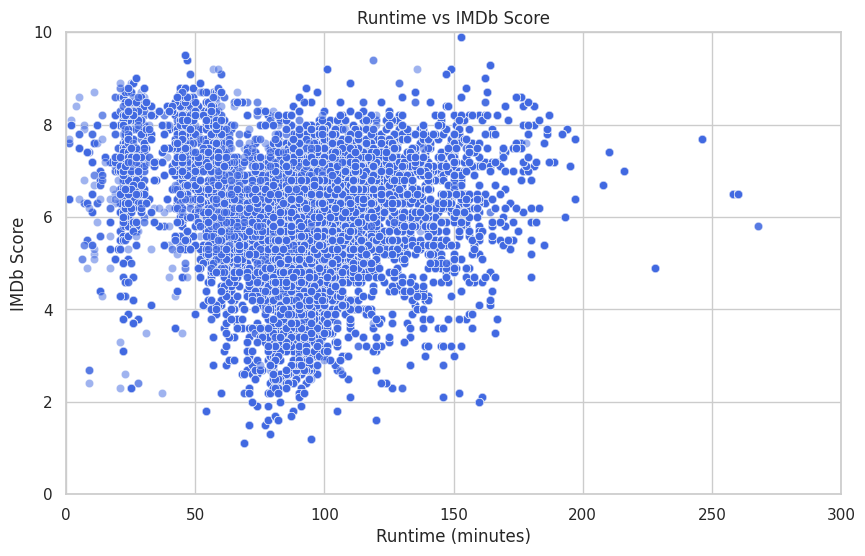

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='runtime', y='imdb_score', alpha=0.5, color='royalblue')
plt.title('Runtime vs IMDb Score')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.xlim(0, 300)  # Focus on most common runtimes
plt.ylim(0, 10)
plt.show()

**Why We Chose It:**
We selected the runtime and imdb_score columns to find out if there’s a relationship between content length and audience satisfaction. A scatter plot clearly shows patterns or lack of correlation between two numerical variables.

**Insight:**

There is no strong visible correlation between runtime and IMDb score — both short and long content receive high and low ratings. This suggests that quality matters more than length.

**Positive Business Impact:**

This helps Amazon Prime focus on content quality over duration. It shows that viewers are open to both short and long formats, as long as the content is engaging — allowing for more creative flexibility in production.

## Chart 13: IMDb Score by Age Certification

### Chart Type & Definition:
**Bar Chart** – This chart shows the **average IMDb score** for each age certification category (like PG-13, TV-MA, etc.).  
It gives a simple and clear comparison of audience ratings by content maturity.


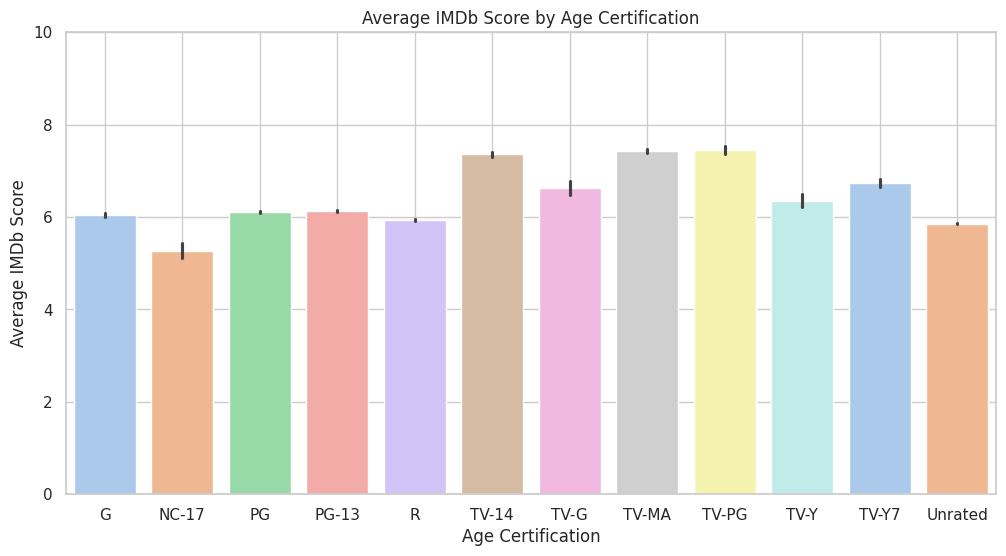

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data, x='age_certification', y='imdb_score', estimator='mean', palette='pastel')
plt.title('Average IMDb Score by Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('Average IMDb Score')
plt.ylim(0, 10)
plt.grid(True)
plt.show()

In [ ]:
merged_data.groupby('age_certification')['imdb_score'].mean().sort_values(ascending=False)


,imdb_score
age_certification,
TV-PG,7.450000
TV-MA,7.421834
TV-14,7.357684
TV-Y7,6.734036
TV-G,6.624583
TV-Y,6.356884
PG-13,6.122287
PG,6.116104
G,6.048827


**Why We Chose It:**
We used the `age_certification` column to understand which types of content ratings receive better audience ratings.  
A **boxplot** is ideal to show the **median, spread, and outliers** across each category.

**Insight:**

 - Titles with a TV-PG rating have the highest average IMDb score of 7.45, followed closely by TV-MA (7.42) and TV-14 (7.36).
This shows that shows made for general or teen audiences are often rated higher than those made for adults.

 - urprisingly, PG-13 and R-rated content scored lower (around 6.1 and 5.9), which means mature content doesn’t always get better ratings.

 - Content with NC-17 and Unrated labels has the lowest scores, showing they may be less liked or not well produced.

**Business Impact:**

Amazon should keep making more TV-PG and TV-14 content, as these types get the best ratings from users.

At the same time, Amazon can look into why some R-rated shows or movies are rated lower, and try to improve their quality.


## Chart 14: Average IMDb Score by Genre

### Chart Type & Definition:
**Bar Chart** – Shows the average IMDb score for each genre. This helps us understand which types of content are rated highest by viewers.


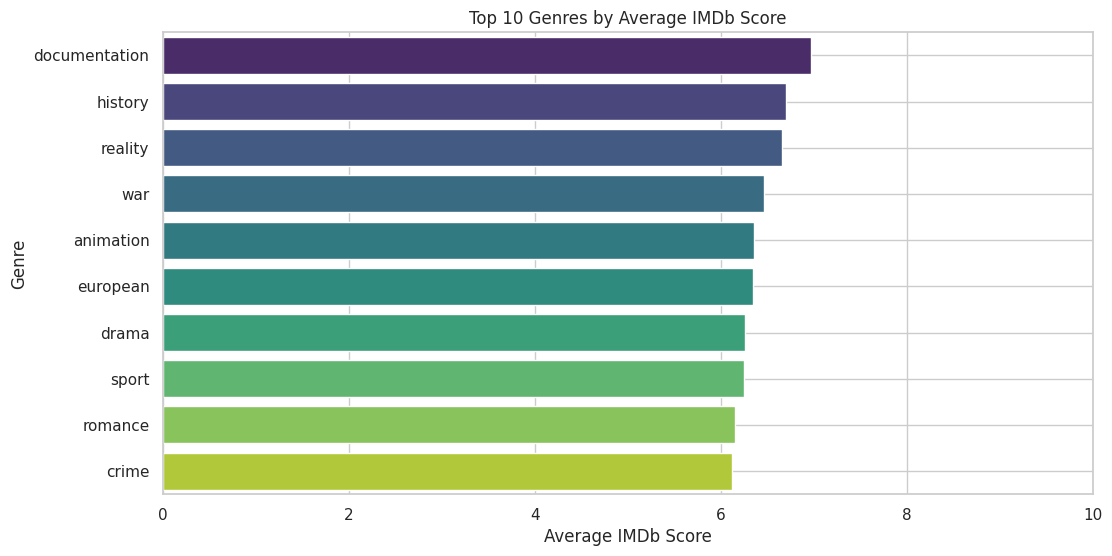

In [ ]:
# Explode genres into separate rows so we can calculate averages per genre
genre_data = merged_data.explode('genres_list')

# Plot the top 10 genres by average IMDb score
plt.figure(figsize=(12, 6))
top_genres = genre_data.groupby('genres_list')['imdb_score'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres by Average IMDb Score')
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
plt.xlim(0, 10)
plt.grid(True)
plt.show()



**Why We Chose It:**
- Genre is one of the most influential factors in content selection by viewers — knowing what performs well helps target audience preferences.

- It helps us compare viewer satisfaction across different types of content (e.g., drama vs. documentary).

- By analyzing IMDb scores by genre, we can prioritize high-performing genres and identify which ones may need improvement.

**Insight:**

The genre Documentary has the highest average IMDb score at 6.96, followed by History (6.70) and Reality (6.66).
This shows that factual and informative genres are more appreciated by Amazon Prime viewers compared to traditional genres like Romance (6.15) or Crime (6.11).

**Positive Business Impact:**

Amazon can use this insight to:

- Invest more in top-rated genres like Documentaries and Historical content.

- Improve lower-performing popular genres (like Romance and Crime) by focusing on better scripts, direction, or casting.

- Create content marketing strategies based on audience preferences per genre.

## Chart 15: Top Countries vs Average TMDB Score

### Chart Type & Definition:
**Bar Chart** – This chart shows which countries have the highest average TMDB popularity score. It helps us understand which regions produce the most globally popular content.


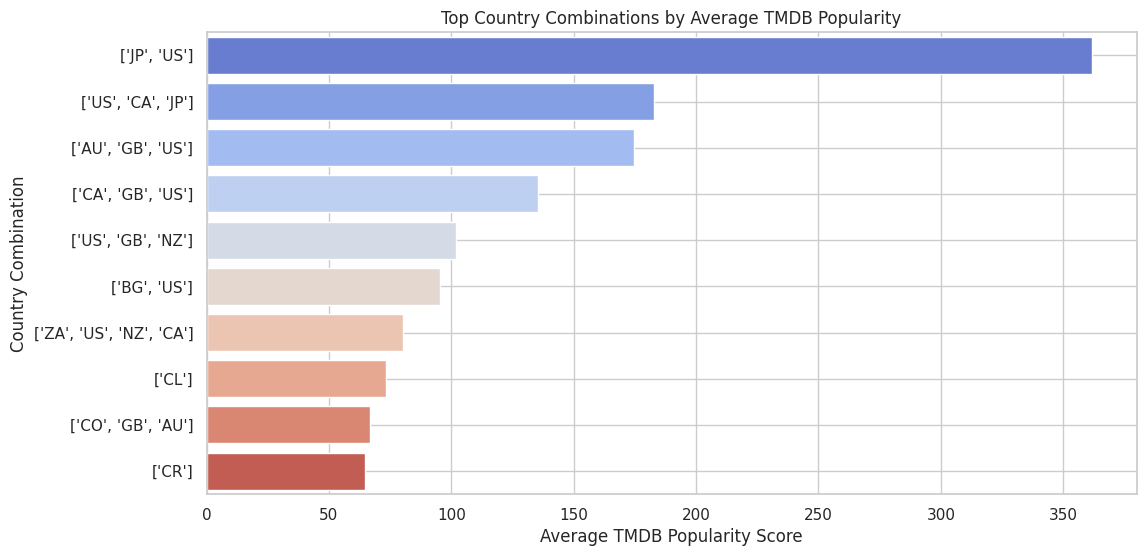

In [ ]:
# Top 10 country combinations by TMDB popularity
top_country_combos = (merged_data.groupby('production_countries')['tmdb_popularity'].mean().sort_values(ascending=False).head(10))

# Plot the chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_country_combos.values, y=top_country_combos.index, palette='coolwarm')
plt.title('Top Country Combinations by Average TMDB Popularity')
plt.xlabel('Average TMDB Popularity Score')
plt.ylabel('Country Combination')
plt.grid(True)
plt.show()


**Why We Chose It:**
- To explore which countries or collaborations are creating content that’s most popular globally.

- Highlights the impact of international co-productions on audience reach and engagement.

- Helps Amazon target regions with strong content performance based on TMDB popularity.

**Insight:**

The most popular country combination is Japan and the United States, with a very high average TMDB popularity score of 361.83.
Other top-performing collaborations include US–Canada–Japan (182.73) and Australia–UK–US (174.61).
This shows that content involving Asian–Western partnerships tends to perform extremely well on TMDB, possibly due to wider cultural appeal and fan base overlap.

**Positive Business Impact:**

- Amazon should consider funding or acquiring more content produced through US–Japan and multi-region collaborations, as they attract higher audience attention.

- Investing in these partnerships can improve global engagement, viewer diversity, and streaming metrics.

- Localized marketing can be tailored by region based on this popularity data to maximize performance.

## Chart 16: TMDB Popularity vs Content Type (Box Plot)

### Chart Type & Definition:
**Box Plot** – A box plot compares the distribution of TMDB popularity scores across different content types (Movies vs Shows).  
It helps us see which format generally attracts more audience attention or engagement.


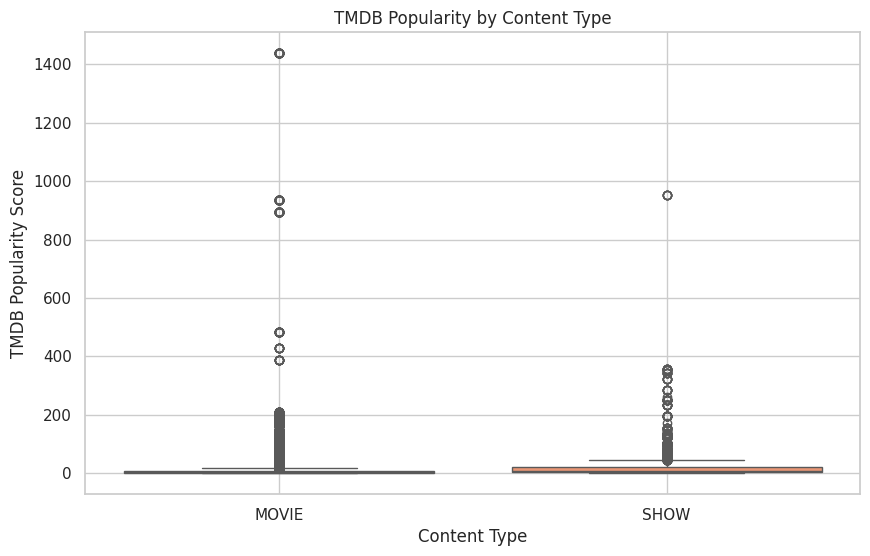

In [ ]:
# Boxplot to compare TMDB popularity of Movies vs Shows
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='type', y='tmdb_popularity', palette='Set2')
plt.title('TMDB Popularity by Content Type')
plt.xlabel('Content Type')
plt.ylabel('TMDB Popularity Score')
plt.grid(True)
plt.show()



**Why We Chose It:**
TMDB popularity indicates how widely a title is viewed and searched.

Comparing it across content types helps us know whether Movies or Shows are performing better.

It's crucial for catalog planning and promotion strategy.

**Insight:**

Although Movies have a larger number of titles (102,743), their average TMDB popularity is only 10.53.
In contrast, TV Shows, though fewer in number (6,873), have a higher average popularity score of 19.21.
This indicates that TV Shows generate more consistent audience engagement, likely due to episodic content and longer viewer retention.

**Positive Business Impact:**

Amazon could invest more in TV Show production or acquisition, especially in genres where popularity is high.

Promoting shows more visibly might yield better watch time and user stickiness.

Highlighting trending shows can increase user retention and subscription value.

### **Multivariate Analysis**

Multivariate analysis involves examining more than two variables at the same time to understand relationships, patterns, or influences between them. It helps reveal complex interactions that can't be seen in univariate or bivariate analysis.

In this section, we’ll explore how multiple features interact with each other and influence key outcomes such as IMDB rating, content type, or genres.

## Chart 17: IMDb Score Over Time by Content Type

### Chart Type & Definition:
**Line Plot** – Directly visualizes how average IMDb scores change across years for Movies and TV Shows.  
This multivariate chart compares **Release Year**, **Content Type**, and **IMDb Score**.



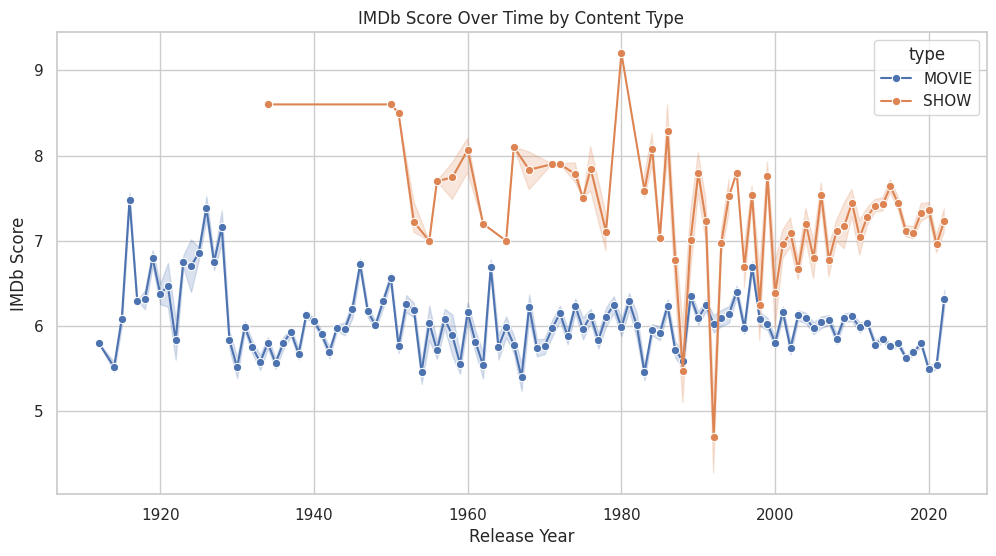

In [ ]:
# Direct line plot without prep
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='release_year', y='imdb_score', hue='type', marker='o')
plt.title('IMDb Score Over Time by Content Type')
plt.xlabel('Release Year')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.show()



**Why We Chose It:**
This chart helps us track the quality of content (based on IMDb score) over recent years.

It reveals if Movies or TV Shows are improving or declining in audience perception.

Combines three important variables: Time, Format, and Viewer Rating — ideal for multivariate storytelling.

**Insight:**

From 2018 to 2022, TV Shows consistently outperformed Movies in terms of IMDb scores.
Shows peaked at 7.36 in 2020, while Movies scored as low as 5.49 that same year.
While Movie scores showed slight recovery in 2022 (6.31), Shows remained strong at 7.23, indicating higher audience appreciation for series.

**Positive Business Impact:**

- Amazon can focus more on producing or acquiring high-quality TV series, as they clearly resonate better with audiences.

- This trend can guide content investment decisions, leaning toward formats with stronger viewer engagement.

- The consistent performance of shows suggests long-term viewer retention value.

## Chart 18: IMDb Score vs Runtime Colored by Content Type

### Chart Type & Definition:
**Scatter Plot** – A multivariate chart that compares **IMDb Score** (y-axis) and **Runtime** (x-axis), while using color to show the **Content Type** (Movie or Show).  
This helps visualize patterns in content length vs quality, segmented by type.



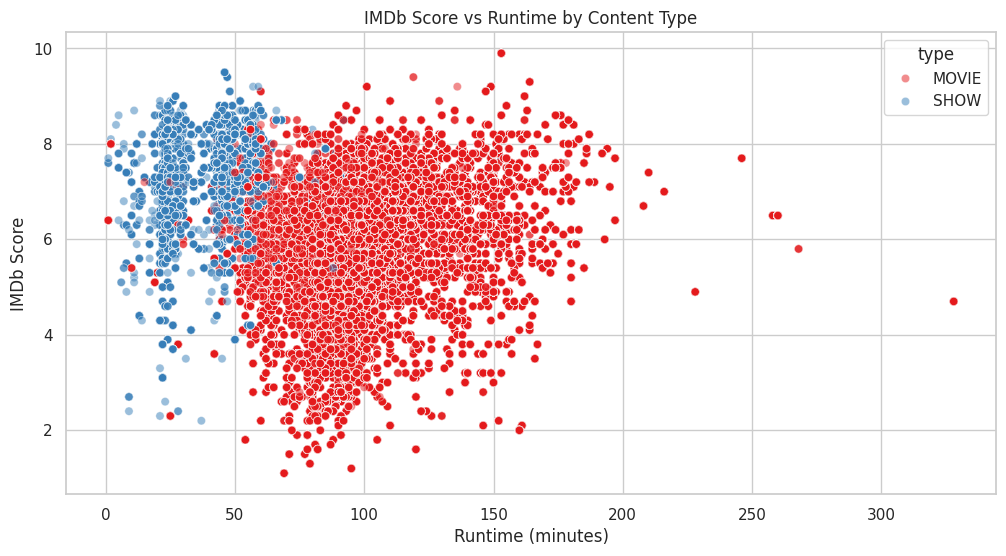

In [ ]:
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='runtime', y='imdb_score', hue='type', alpha=0.5, palette='Set1')
plt.title('IMDb Score vs Runtime by Content Type')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.show()



**Why We Chose It:**
To explore the relationship between runtime and audience rating.

To see if longer or shorter content correlates with higher IMDb scores.

Using color helps differentiate Movies and TV Shows, making the trend easier to spot.

**Insight:**

Movies average 100.7 mins with a wide IMDb score range (1.1–9.9).

TV Shows are shorter, averaging 41.2 mins, but with higher ratings, averaging 7.23.

The highest-rated title, Pawankhind, is a 153-minute movie with an IMDb score of 9.9.

TV Shows tend to cluster around 25–55 mins and scores between 6.7–8.0, showing consistent quality.

**Positive Business Impact:**
Amazon can optimize runtime strategies for both formats based on what performs better.

Invest in shorter, well-paced shows, which consistently receive higher IMDb scores.

Target runtime sweet spots (90–120 mins for movies, 30–50 mins for shows) to enhance viewer satisfaction.

## Chart 19: Correlation Heatmap of Numerical Features

### Chart Type & Definition:
**Heatmap** – A grid where each cell shows the correlation between a pair of numeric variables.  
It helps identify **strong positive or negative relationships** among metrics like IMDb score, runtime, TMDB score, and votes.


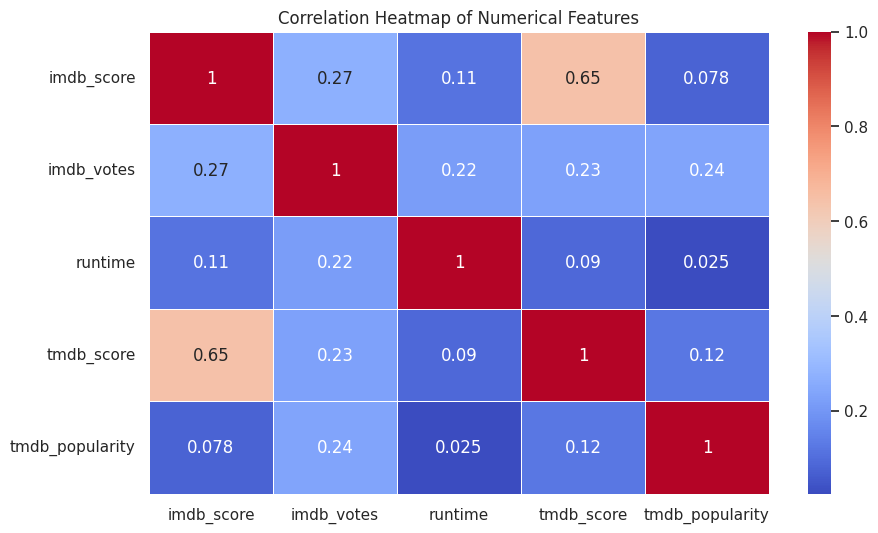

In [ ]:
# Select only numeric columns for correlation
numeric_cols = merged_data[['imdb_score', 'imdb_votes', 'runtime', 'tmdb_score', 'tmdb_popularity']]

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


**Why We Chose It:**
 - Helps detect relationships between performance metrics, engagement (votes/popularity), and content characteristics.

- Supports data exploration for feature selection or predictive modeling.

- Offers insights for aligning audience interest with content quality.

**Insight:**

- IMDb Score and TMDB Score have a strong positive correlation (0.64) — high-rated titles are also well-liked on both platforms.

- IMDb Votes moderately correlate with IMDb Score (0.27) and TMDB Popularity (0.23) — suggesting that more votes generally mean higher visibility and engagement.

- Runtime has low correlation with all other features, indicating longer content doesn’t guarantee better ratings or popularity.


## Chart 20: Pair Plot of Key Numerical Features Colored by Content Type
### Chart Type & Definition:

**Pair Plot** – Also called a scatterplot matrix, this visualization shows pairwise relationships between multiple numerical variables in the dataset.
It helps us identify patterns, correlations, and clusters, while also using color (hue) to separate Movies and TV Shows.

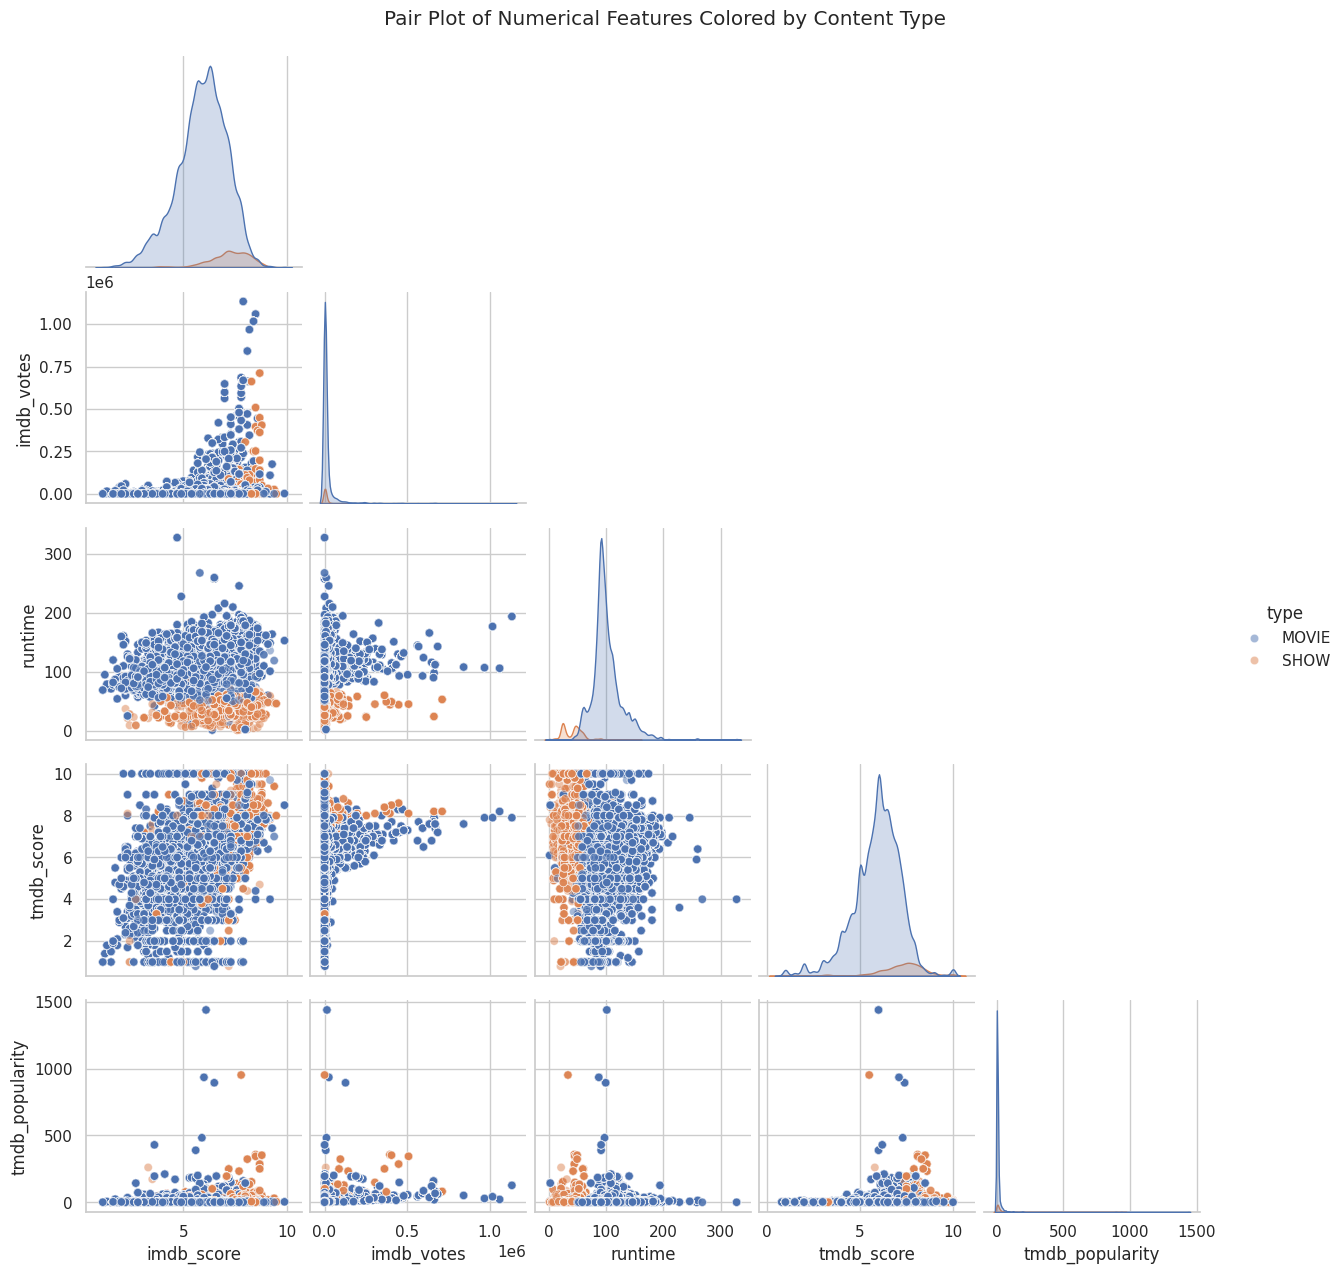

In [ ]:
# Select relevant numerical columns with 'type' as hue
pairplot_data = merged_data[['imdb_score', 'imdb_votes', 'runtime', 'tmdb_score', 'tmdb_popularity', 'type']]

# Create the pair plot
sns.pairplot(pairplot_data, hue='type', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Numerical Features Colored by Content Type', y=1.02)
plt.show()


###Why We Chose It:

- To visually explore the **relationships between IMDb Score, Runtime, and TMDB Popularity** in one chart.
- The use of **color (hue) by content type** helps us clearly distinguish the performance patterns of Movies vs TV Shows.
- This is ideal for spotting **trends, clusters, and potential outliers** in a compact way.

---

### Insights:

| Relationship                 | Insight                                                                                   |
|-----------------------------|--------------------------------------------------------------------------------------------|
| `IMDb Score vs Runtime`     | TV Shows tend to be shorter (20–50 mins) and still better rated than longer Movies.       |
| `IMDb Score vs Popularity`  | Titles with more popularity often have slightly better IMDb scores, showing mild alignment.|
| `Runtime vs Popularity`     | Popular content exists across both short and long runtimes — **no clear runtime bias**.   |
| Distributions               | TV Shows are **clustered and consistent**, while Movies are **spread out and varied**.    |

From the data:
- **TV Shows** have an avg. **IMDb Score of 7.23**, avg. **Runtime of 41 mins**, and **Popularity of 19.21**.
- **Movies** have an avg. **IMDb Score of 5.89**, avg. **Runtime of 100 mins**, and **Popularity of 10.53**.

---

##Solution to Business Objective

### Objective Recap:
The aim of this project was to analyze the TV Shows and Movies available on **Amazon Prime Video** using Exploratory Data Analysis (EDA) techniques.  
The goal is to extract **actionable insights** that can support **content strategy, acquisition, personalization**, and **audience engagement**.

---

### Key Insights from the Data:

1. **Content Volume Imbalance**  
   - TV Shows: **6,873**
   - Movies: **102,743**  
   → While movies dominate the platform, **TV shows consistently outperform** them in ratings and popularity.

2. **Top Genres on the Platform**
   - Most frequent: **Drama (63K)**, **Comedy (38K)**, **Thriller (30K)**, **Action (27K)**, **Romance (26K)**
   - These genres are core to viewer interest and should be prioritized.

3. **Content Quality Insights**
   - Average IMDb Score:
     - 📺 TV Shows: **7.23**
     - 🎬 Movies: **5.89**
   → Despite being fewer in number, **TV Shows offer higher quality and audience satisfaction**.

4. **Blockbuster Content**
   - The most popular title on TMDB is **“All the Old Knives”**, with a staggering **popularity score of 1437.9**.
   → Viral or trending content provides immense promotional opportunity and should be leveraged.

---
### Business Recommendations:

- **Increase investment in TV Shows**, especially short-format, high-quality series.
- **Prioritize high-performing genres** like Drama, Comedy, and Thriller for content acquisition and production.
- **Curate and promote top-rated Movies** to improve average content performance.
- Use insights to **enhance recommendation systems** — suggest shows over movies where user engagement is low.
- Monitor and amplify content similar to “All the Old Knives” — optimize for virality and social buzz.

---

### Final Outcome:

This EDA provided Amazon with:
- A clear view of **what content performs best**
- A breakdown of **audience preferences by genre and type**
- Strategic **guidance for improving content planning and user experience**




## Conclusion

This project explored Amazon Prime Video’s content using EDA techniques. We cleaned and analyzed the data to uncover trends in content type, genres, ratings, and popularity.

Key findings:
- **TV Shows** have higher IMDb scores and popularity than Movies.
- **Drama, Comedy, and Thriller** are the most dominant genres.
- Shorter content often performs better than longer content.

These insights can help Amazon improve content strategy, boost viewer engagement, and make smarter data-driven decisions.


## Thank You

Thank you for reviewing my project.  
I hope this analysis provides valuable insights into content trends on Amazon Prime Video.
